In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
url = 'https://www.movehub.com/blog/popular-countries-map/'
html = requests.get(url).content
soup = BeautifulSoup(html, "lxml")  
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <link href="http://gmpg.org/xfn/11" rel="profile"/>\n  <link href="https://www.movehub.com/wp/xmlrpc.php" rel="pingback"/>\n  <link href="https://images.movehub.com/wp-content/uploads/2018/01/14093308/movehub-32.png" rel="shortcut icon"/>\n  <link href="https://images.movehub.com/wp-content/uploads/2018/01/14093300/movehub-57.png" rel="apple-touch-icon-precomposed"/>\n  <link href="https://images.movehub.com/wp-content/uploads/2018/01/14093257/movehub-72.png" rel="apple-touch-icon-precomposed"/>\n  <link href="https://images.movehub.com/wp-content/uploads/2018/01/14093253/movehub-114.png" rel="apple-touch-icon-precomposed"/>\n  <title>\n   Map of The Most Popular Countries in the World | MoveHub\n  </title>\n  <script>\n   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElem

In [3]:
soup2 = soup.find_all('td')

In [4]:
lst1 = [element.text for element in soup2[:-1:3]]
lst2 = [element.text for element in soup2[1:-1:3]]
lst3 = [element.text.replace(',','') for element in soup2[2:-1:3]]

In [5]:
df = pd.DataFrame(list(zip(lst1, lst2, lst3)), 
               columns =['Rank', 'Country', 'Anual Visitors']) 
df

df = df.astype({'Anual Visitors': 'int64'})

df['Anual_Million'] = df.apply(lambda x: round(x['Anual Visitors']/1000000,1),axis=1)
df

,Rank,Country,Anual Visitors,Anual_Million
0,1,France,81400000,81.4
1,2,United States,62700000,62.7
2,3,China,57600000,57.6
3,4,Spain,56700000,56.7
4,5,Italy,46100000,46.1
5,6,Turkey,34000000,34.0
6,7,United Kingdom,29300000,29.3
7,8,Germany,28400000,28.4
8,9,Russian Federation,24900000,24.9
9,10,Malaysia,24700000,24.7


In [12]:
df = df.astype({'Anual Visitors': 'int64'})

In [13]:
df = df.astype({'Rank': 'int64'})

In [14]:
df_limit = df.head(10)

In [18]:
df.dtypes

Rank                int64
Country            object
Anual Visitors      int64
Anual_Million     float64
dtype: object

Text(0, 0.5, 'Anual_Million')

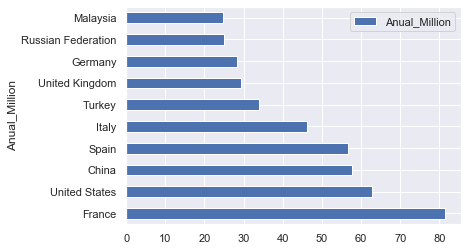

In [25]:
df.head(10).plot.barh('Country','Anual_Million')
plt.ylabel('Anual_Million')
#plt.ticklabel_format(axis='y',scilimits=(10,6))
#ax.ticklabel_format(axis='y',scilimits=(10,6))

In [16]:
url = 'https://www.telegraph.co.uk/travel/destinations/europe/france/articles/france-city-breakguide/'
html = requests.get(url).content
soup = BeautifulSoup(html, "lxml")  
soup.prettify()

'<!DOCTYPE html>\n<html class="articleRenderer2HTML no-js" lang="en-GB" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">\n <head>\n  <script data-pagespeed-no-defer="">\n   //<![CDATA[\n(function(){function d(b){var a=window;if(a.addEventListener)a.addEventListener("load",b,!1);else if(a.attachEvent)a.attachEvent("onload",b);else{var c=a.onload;a.onload=function(){b.call(this);c&&c.call(this)}}}var p=Date.now||function(){return+new Date};window.pagespeed=window.pagespeed||{};var q=window.pagespeed;function r(){this.a=!0}r.prototype.c=function(b){b=parseInt(b.substring(0,b.indexOf(" ")),10);return!isNaN(b)&&b<=p()};r.prototype.hasExpired=r.prototype.c;r.prototype.b=function(b){return b.substring(b.indexOf(" ",b.indexOf(" ")+1)+1)};r.prototype.getData=r.prototype.b;r.prototype.f=function(b){var a=document.getElementsByTagName("script"),a=a[a.length-1];a.parentNode.replaceChild(b,a)};r.prototype.replaceLastScript=r.prototype.f;\nr.prototype.g=

In [17]:
soup2 = soup.find_all('h3')
soup2

[<h3 class="follow-list__heading">Follow the author of this article</h3>,
 <h3 class="list-of-entities__item-body-headline">
 <a data-rel="editorial" data-tmg-dtm-nav="body-headline" href="/travel/destinations/europe/france/articles/france-summer-holidaysguidebeachresorts/">Beach</a>
 </h3>,
 <h3 class="list-of-entities__item-body-headline">
 <a data-rel="editorial" data-tmg-dtm-nav="body-headline" href="/travel/destinations/europe/france/articles/france-summer-holidaysguideself-cateringandvillas/">Villa</a>
 </h3>,
 <h3 class="list-of-entities__item-body-headline">
 <a data-rel="editorial" data-tmg-dtm-nav="body-headline" href="/travel/destinations/europe/france/articles/france-summer-holidaysguideculture/">Culture</a>
 </h3>,
 <h3 class="list-of-entities__item-body-headline">
 <a data-rel="editorial" data-tmg-dtm-nav="body-headline" href="/travel/destinations/europe/france/articles/france-summer-holidaysguidefoodandwine/">Food</a>
 </h3>,
 <h3 class="list-of-entities__item-body-headl

In [ ]:
rank = [element.text for element in soup2]
rank1 = rank[7:19]
print(rank1)

In [ ]:
rank2 = ' '.join(rank1)
rank2

In [ ]:
x = re.findall('\w+\-*\w*',rank2)
x

In [ ]:
x1 = [x[x.index(element)] for element in x if x.index(element)%2==0]
x1

In [ ]:
x2 = [x[x.index(element)] for element in x if x.index(element)%2!=0]
x2

In [ ]:
df2 = pd.DataFrame(list(zip(x1,x2)), 
               columns =['Rank', 'City']) 
df2